# Data Analysis

Here we need a `.csv` file in order to do the desired analysis.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

In [58]:
df = pd.read_csv('formatted_data_oct01.csv')
df["datetime"] = pd.to_datetime(df["Datetime"])
# df = df.set_index('datetime')
del df["Datetime"]
df["approx datetime"] = df["datetime"].round('5min') # redondeamos a los 5 mins más cercanos (frec. de los videos) 

# del df["Turbidity"]
# del df["pH"]
# del df["Light"]
df = df.sort_values('datetime', ignore_index=True)
# df = df.sort_index()
df.head(10)

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids,datetime,approx datetime
0,14.75,14.5,91.0,33.63,1023.0,10.0,0.0,34.70,6.25,8.02,278.69,2021-10-01 04:31:30,2021-10-01 04:30:00
1,14.13,13.6,85.0,34.28,1023.0,11.0,0.0,-822.25,6.66,8.12,273.51,2021-10-01 04:31:30,2021-10-01 04:30:00
2,15.25,15.1,86.0,33.75,1023.0,9.0,0.0,-875.19,6.13,7.90,284.79,2021-10-01 04:31:30,2021-10-01 04:30:00
3,13.50,12.8,87.0,36.00,1023.0,10.0,0.0,-1063.29,6.54,8.31,268.38,2021-10-01 04:31:30,2021-10-01 04:30:00
4,12.63,12.4,89.0,34.88,1023.0,11.0,0.0,-835.45,6.58,8.16,263.28,2021-10-01 04:31:30,2021-10-01 04:30:00
5,14.13,13.6,85.0,34.69,1023.0,11.0,0.0,-861.92,6.66,8.12,274.37,2021-10-01 04:31:35,2021-10-01 04:30:00
6,15.25,15.1,85.0,33.77,1023.0,11.0,0.0,-861.92,6.21,7.90,282.17,2021-10-01 04:31:35,2021-10-01 04:30:00
7,13.50,12.8,87.0,35.57,1023.0,10.0,0.0,-809.07,6.46,8.31,268.38,2021-10-01 04:31:35,2021-10-01 04:30:00
8,12.63,12.4,89.0,34.52,1023.0,12.0,0.0,-968.69,6.66,8.15,263.28,2021-10-01 04:31:35,2021-10-01 04:30:00
9,14.75,14.5,91.0,34.06,1023.0,11.0,0.0,-1172.74,5.97,8.02,280.43,2021-10-01 04:31:35,2021-10-01 04:30:00


In [10]:
start_time = df.head(1)['datetime']
end_time = df.tail(1)['datetime']

print(f"Data starts at: {start_time}")
print(f"Data ends at: {end_time}")

Data starts at: 0   2021-10-01 04:31:30
Name: datetime, dtype: datetime64[ns]
Data ends at: 87521   2021-10-02 04:31:25
Name: datetime, dtype: datetime64[ns]


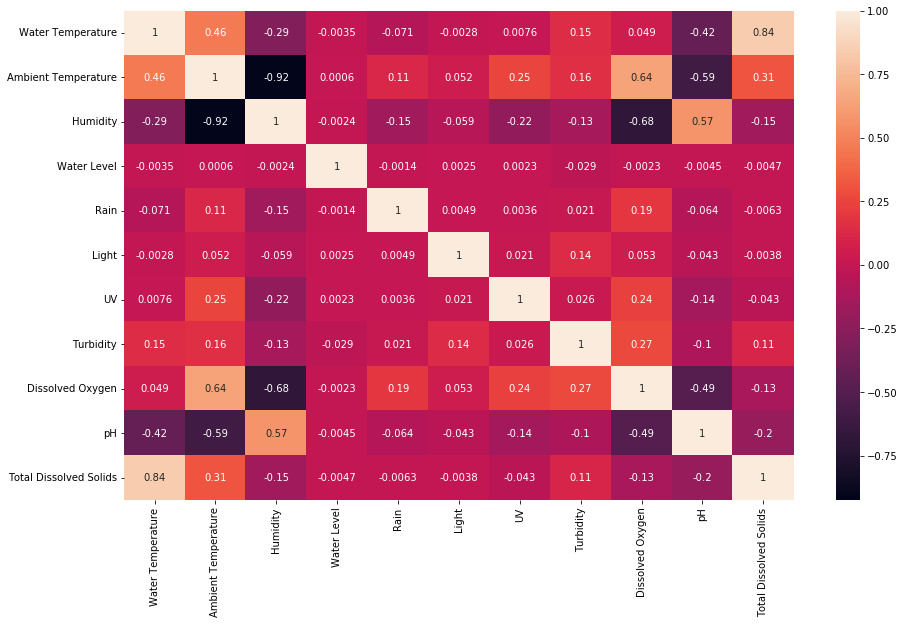

In [12]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

## Strongly Correlated Variables

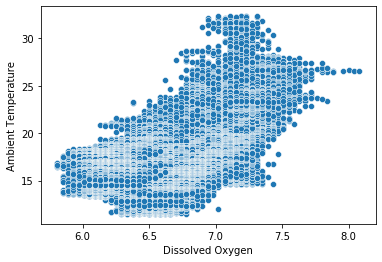

In [13]:
sns.scatterplot(x=df["Dissolved Oxygen"], y=df["Ambient Temperature"], data=df)

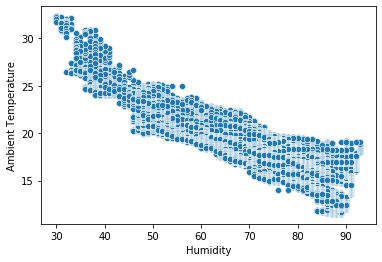

In [14]:
sns.scatterplot(x=df["Humidity"], y=df["Ambient Temperature"], data=df)

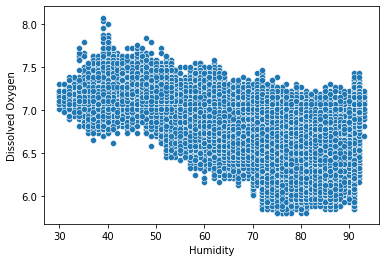

In [15]:
sns.scatterplot(x=df["Humidity"], y=df["Dissolved Oxygen"], data=df)

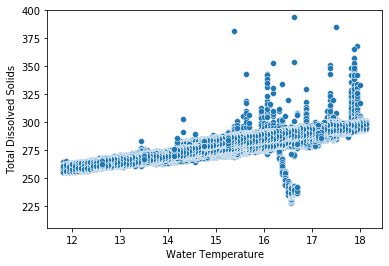

In [16]:
scatter = sns.scatterplot(x=df["Water Temperature"], y=df["Total Dissolved Solids"], data=df)
scatter.set_ylim(top=400);

## Weakly/Not at all Corelated Variables

(25, 40)

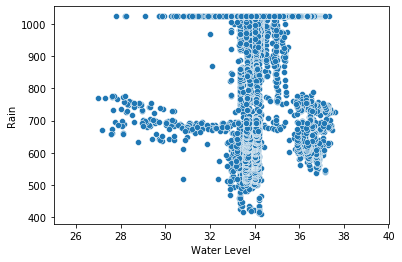

In [17]:
scatter = sns.scatterplot(x=df["Water Level"], y=df["Rain"], data=df)
scatter.set_xlim(left=25, right=40)

# Merging Video Data with Physicochemical Vars

In [52]:
video_df = pd.read_csv('video_data_firstTry.csv')
video_df["datetime"] = pd.to_datetime(video_df["timestamp"])
del video_df["timestamp"]
video_df["approx datetime"] = video_df["datetime"].round('5min') # redondeamos a los 5 mins más cercanos (frec. de los videos) 
# video_df = video_df.set_index('datetime')

# video_df = video_df.sort_index()

In [56]:

video_df.head()

,Average Distance,Average X,Average Y,Average Pairwise Distance,datetime,approx datetime
0,451.3397,236,122,140.0047,2021-10-01 08:44:39,2021-10-01 08:45:00
1,573.6886,225,125,162.3532,2021-10-01 08:49:40,2021-10-01 08:50:00
2,351.5690,206,137,178.6284,2021-10-01 08:54:41,2021-10-01 08:55:00
3,286.2775,187,146,188.1491,2021-10-01 08:59:42,2021-10-01 09:00:00
4,178.9982,201,135,188.0970,2021-10-01 09:04:44,2021-10-01 09:05:00


In [43]:
df.head()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids
datetime,,,,,,,,,,,
2021-10-01 16:24:00,14.19,20.3,56.0,35.30,1023.0,965.0,920.0,3044.05,7.19,5.82,279.56
2021-10-01 16:24:00,14.19,20.3,57.0,35.44,1023.0,967.0,915.0,2849.04,7.35,5.84,282.17
2021-10-01 16:24:05,14.19,20.3,57.0,35.01,1023.0,1007.0,915.0,2888.22,6.94,5.84,275.23
2021-10-01 16:24:10,14.19,20.4,56.0,34.89,1023.0,996.0,915.0,1918.56,7.51,5.78,285.67
2021-10-01 16:24:15,14.19,20.4,56.0,34.96,1023.0,1006.0,920.0,2845.87,6.86,5.86,271.79


In [51]:
merged_df = pd.merge(df, video_df, how='inner', left_index=True, right_index=True)
merged_df

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids,Average Distance,Average X,Average Y,Average Pairwise Distance
datetime,,,,,,,,,,,,,,,
2021-10-01 08:49:40,13.50,18.1,65.0,34.70,1023.0,11.0,160.0,-1859.46,6.86,8.11,268.38,573.6886,225,125,162.3532
2021-10-01 08:49:40,15.06,18.8,79.0,33.85,1023.0,10.0,445.0,-756.58,6.62,7.93,283.04,573.6886,225,125,162.3532
2021-10-01 08:49:40,14.44,18.9,66.0,33.74,1023.0,11.0,405.0,-588.44,6.74,8.17,280.43,573.6886,225,125,162.3532
2021-10-01 08:49:40,11.94,15.9,74.0,34.98,1023.0,10.0,140.0,-1186.52,6.66,6.08,259.91,573.6886,225,125,162.3532
2021-10-01 08:49:40,13.19,16.7,69.0,35.66,1023.0,11.0,200.0,-1009.10,6.82,8.33,264.13,573.6886,225,125,162.3532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-02 04:23:25,12.69,12.3,90.0,34.93,1023.0,11.0,0.0,-1889.19,6.38,8.16,262.44,2343.9147,26,3,16.7310
2021-10-02 04:23:25,14.75,14.5,91.0,34.06,1023.0,11.0,0.0,-1653.85,6.01,8.02,281.30,2343.9147,26,3,16.7310
2021-10-02 04:23:25,13.56,12.8,87.0,35.98,1023.0,11.0,0.0,-1022.61,6.54,8.30,266.67,2343.9147,26,3,16.7310
